In [19]:
%run model.ipynb
%run data.ipynb

In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=1)
regr.fit(X_train, y_train)
#svr.fit(X_train, y_train)

Iteration 1, loss = 49.32707778
Iteration 2, loss = 24.64988731
Iteration 3, loss = 21.58588719
Iteration 4, loss = 21.18234534
Iteration 5, loss = 20.86563055
Iteration 6, loss = 20.72295543
Iteration 7, loss = 20.57452653
Iteration 8, loss = 20.43561831
Iteration 9, loss = 20.42009603
Iteration 10, loss = 20.35581345
Iteration 11, loss = 20.27136481
Iteration 12, loss = 20.20657688
Iteration 13, loss = 20.22701029
Iteration 14, loss = 20.19445729
Iteration 15, loss = 20.11758533
Iteration 16, loss = 20.05484427
Iteration 17, loss = 20.02458465
Iteration 18, loss = 20.09630773
Iteration 19, loss = 19.97227857
Iteration 20, loss = 19.79859238
Iteration 21, loss = 19.73958230
Iteration 22, loss = 19.69480920
Iteration 23, loss = 19.54956611
Iteration 24, loss = 19.50597266
Iteration 25, loss = 19.44537142
Iteration 26, loss = 19.43160426
Iteration 27, loss = 19.30988646
Iteration 28, loss = 19.32354920
Iteration 29, loss = 19.33496412
Iteration 30, loss = 19.28028470
Iteration 31, loss 

MLPRegressor(hidden_layer_sizes=(32, 16), learning_rate='adaptive',
             verbose=True)

Text(0, 0.5, 'loss value')

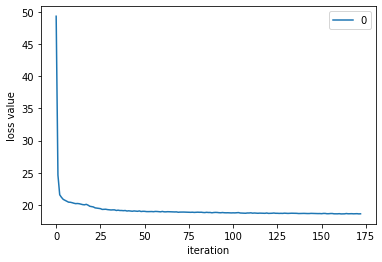

In [22]:
pd.DataFrame(regr.loss_curve_).plot()
plt.xlabel('iteration')
plt.ylabel('loss value')

Text(0, 0.5, 'Measured')

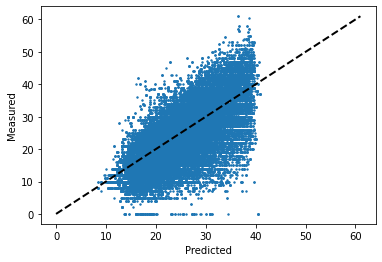

In [24]:
#predict = svr.predict(x)
#svr.score(x,y)
predict = regr.predict(X_test)
regr.score(X_test,y_test)
plt.scatter(predict,y_test,s=2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Measured')

In [25]:
# The mean squared error
from math import sqrt

print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, predict)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, predict))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, predict))

Root mean squared error: 6.16
Mean absolute error: 4.72
R-squared: 0.52


In [26]:
predict = regr.predict(test_without_ID)
val = pd.DataFrame({'預測乳量':predict})
x = test.join(val)
x_group = x.groupby(['ID']).mean()
x_index = list(range(0,x_group.shape[0]))
x_group.index

Int64Index([  480,   742,   743,   744,   745,   793,   794,   800,   801,
              802,
            ...
            37476, 37477, 37478, 37479, 37480, 37481, 37482, 37483, 37484,
            37485],
           dtype='int64', name='ID', length=4263)

Text(0, 0.5, 'predict value')

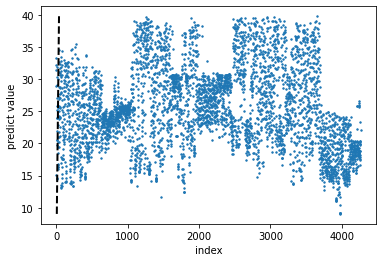

In [27]:
plt.scatter(x_index,x_group['預測乳量'].values,s=2)
#plt.plot(predict_y, predict_y, 'ro')
plt.plot([x_group['預測乳量'].values.min(), x_group['預測乳量'].values.max()], 
         [x_group['預測乳量'].values.min(),x_group['預測乳量'].values.max()], 'k--', lw=2)
plt.xlabel('index')
plt.ylabel('predict value')

In [28]:
for index in range(x_group.shape[0]):
    submission.loc[index, ['1']] = x_group['預測乳量'].values[index]
submission

ID          1
0       480  15.027175
1       742  29.008519
2       743  32.200493
3       744  33.316396
4       745  31.438475
...     ...        ...
4258  37481  19.703878
4259  37482  23.313781
4260  37483  20.393659
4261  37484  19.889799
4262  37485  22.147107

[4263 rows x 2 columns]

In [29]:
submission.columns = ['ID','預測乳量']
submission.to_csv('result.csv',index = False)